In [1]:
import numpy as np
import pylab as mplot
import os
from getdist import plots, MCSamples
from chainconsumer import ChainConsumer

%pylab inline

Color = ['#d45e00', 'grey','k', 'purple']

font = {'size'   : 18}
mplot.rc('font', **font)
mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

In [ ]:
#cosmological_parameters--omega_m       
#cosmological_parameters--h0     
#cosmological_parameters--omega_b        
#cosmological_parameters--n_s    
#cosmological_parameters--a_s    
#cosmological_parameters--omnuh2 
#shear_calibration_parameters--m1        
#shear_calibration_parameters--m2        
#shear_calibration_parameters--m3        
#shear_calibration_parameters--m4        
#intrinsic_alignment_parameters--a       
#intrinsic_alignment_parameters--alpha   
#wl_photoz_errors--bias_1        
#wl_photoz_errors--bias_2        
#wl_photoz_errors--bias_3        
#wl_photoz_errors--bias_4        
#COSMOLOGICAL_PARAMETERS--SIGMA_8        prior   like    post    weight



In [11]:
desy1 = 'des-y1-chain.txt'
Samples = []
file_list = [desy1]

for i in range(1):
    data = np.loadtxt(file_list[i])
    nsample = get_nsample(file_list[i])
    
    Om = data[-nsample:,0] 
    h0 = data[-nsample:,1] 
    Ob = data[-nsample:,2]
    ns = data[-nsample:,3] 
    As = data[-nsample:,4]
    Onuh2 = data[-nsample:,5]

    m1 = data[-nsample:,6]
    m2 = data[-nsample:,7] 
    m3 = data[-nsample:,8]
    m4 = data[-nsample:,9] 
    alpha = data[-nsample:,10] 
    eta = data[-nsample:,11]
    zs1 = data[-nsample:,12] 
    zs2 = data[-nsample:,13] 
    zs3 = data[-nsample:,14]
    zs4 = data[-nsample:,15] 
    
    w = data[-nsample:,-1] 
    s8 = data[-nsample:,-5] 
    S8 = s8*(Om/0.3)**0.5
    
    samples = MCSamples(samples=np.c_[Om,h0,Ob,ns,As,Onuh2,m1,m2,m3,m4,alpha,eta,
                                          zs1,zs2,zs3,zs4,s8,S8],weights=(w),
                names = ['Om','h0','Ob','ns','As','Onuh2','m1','m2','m3','m4',
                         'alpha','eta','zs1','zs2','zs3','zs4','sigma8','S8'],
                labels = [r'$\Omega_{\rm m}$', r'$h_{0}$', r'$\Omega_{b}$', r'$n_s$', r'$A_s$', 
                          r'$\Omega_{\rm \nu}h^2$',
                          r'$m_1$', r'$m_2$', r'$m_3$', r'$m_4$', 
                          r'$\alpha$', r'$\eta$', r'$zs_1$', r'$zs_2$', r'$zs_3$', r'$zs_4$', 
                          r'$\sigma_{8}$',r'$S_{8}$'])
    
    Samples.append(samples)

Removed no burn in


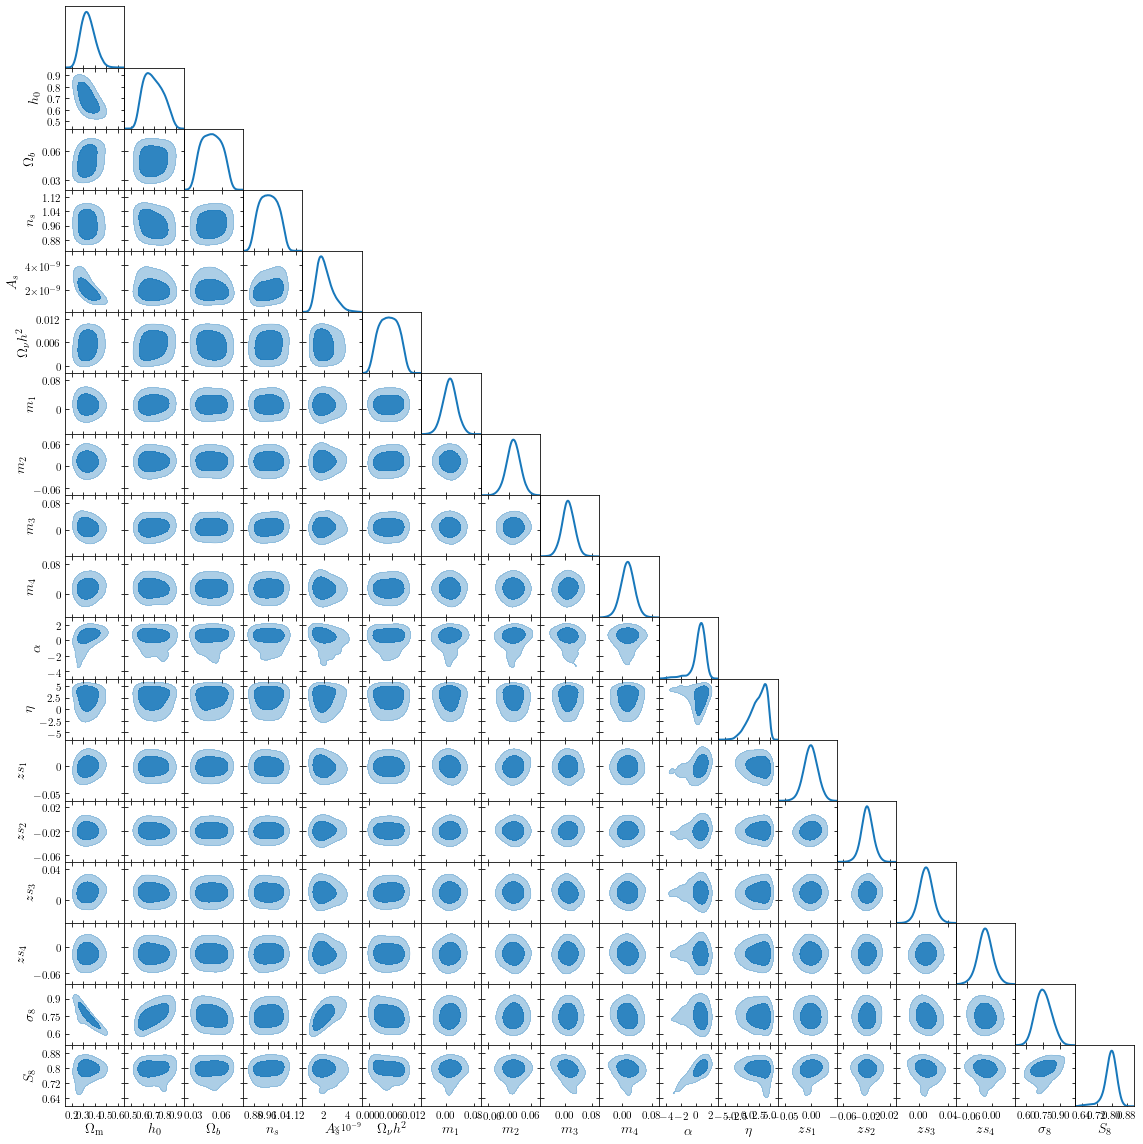

In [12]:
g = plots.getSubplotPlotter(width_inch=16)
g.settings.axes_fontsize   = 11
g.settings.lab_fontsize    = 14
g.settings.legend_fontsize = 10

g.triangle_plot([Samples[0]], ['Om','h0','Ob','ns','As','Onuh2','m1','m2','m3','m4',
                         'alpha','eta','zs1','zs2','zs3','zs4','sigma8','S8'], 
          filled=[True,True,True], colors=['#1878bb','#f19382','#c52b87'], alphas=[0.9,0.9,1], lw=[3,3,3],
          legend_labels=["DES Y1"], 
          legend_loc='upper right', 
          line_args=[{'lw':2, 'color':'#1878bb'}, {'lw':2, 'color':'#f19382'},  {'lw':2, 'ls': '--', 'color':'#c52b87'}], 
          contour_colors=['#1878bb','#f19382','#c52b87'])
